In [23]:
import numpy as np
import math
import pandas as pd
# input material properties

# calcualte alpha

# calcualte teh melt pool depth

# return pi1, pi2 

# heat of fusion for alu is 10.79 kJ/mol ???
# or 4*10^5 J/kg

# t0 will be 300K
# t_solid will be 580 + 273 K = 853 K

# rho = 2700 kg/m^3

# Cp = 0.915 kJ/kgK

# diffusivity = 9.7 * 10^-5 m^2/s

# lets take the absorptivity as 0.3 the same as in the paper
# assume that lasre power is at least 100W set the absorbptivity to 0.4 accoridn to the material paper


# we have: 
# maybe absorptivity, power, rho, cp, T_solid, T_0, hf, Diffusivity, scan_speed, beam_diameter

# ask abou the beam diameter, absorptivity

# we dont have:
# 


def H_star(absorptivity=0.3, power=400.0, rho=2500.0, Cp=915.0, T_solid=853.0, T_0=300.0, hf=40000.0, Diffusivity=0.000097, scan_speed=0.5, beam_diameter=0.0001):

    H = (4 * absorptivity * power)/(np.pi*rho*(Cp*(T_solid - T_0) + hf) * np.sqrt(Diffusivity * scan_speed * beam_diameter**3))

    #write the values for the variables in a csv file 
        

    return H

test_1 = H_star()

print(test_1)



# write a loop to go through power bewtween 50 and 400W, scan speed between 0.750 and 3.0

#H * fourier number * absorptivity

df = pd.DataFrame(columns=['Power', 'Scan Speed', 'H_star'])

for power in np.linspace(50, 400, 20):
    for scan_speed in np.linspace(0.1, 3.0, 20):
        H_star_val = H_star(power=power, scan_speed=scan_speed)*100*0.9*0.3
        df = df._append({'Power': power, 'Scan Speed': scan_speed, 'H_star': H_star_val}, ignore_index=True)

print(df)

# write all the values for the variables in a csv file
df.to_csv('H_star_values.csv')




16.072810378421977
     Power  Scan Speed      H_star
0     50.0    0.100000  121.297151
1     50.0    0.252632   76.314451
2     50.0    0.405263   60.253467
3     50.0    0.557895   51.354023
4     50.0    0.710526   45.505146
..     ...         ...         ...
395  400.0    2.389474  198.513233
396  400.0    2.542105  192.461481
397  400.0    2.694737  186.931464
398  400.0    2.847368  181.852282
399  400.0    3.000000  177.165829

[400 rows x 3 columns]


/tmp/ipykernel_15429/1301315206.py:61: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({'Power': power, 'Scan Speed': scan_speed, 'H_star': H_star_val}, ignore_index=True)


In [24]:
df.head()

,Power,Scan Speed,H_star
0,50.0,0.100000,121.297151
1,50.0,0.252632,76.314451
2,50.0,0.405263,60.253467
3,50.0,0.557895,51.354023
4,50.0,0.710526,45.505146


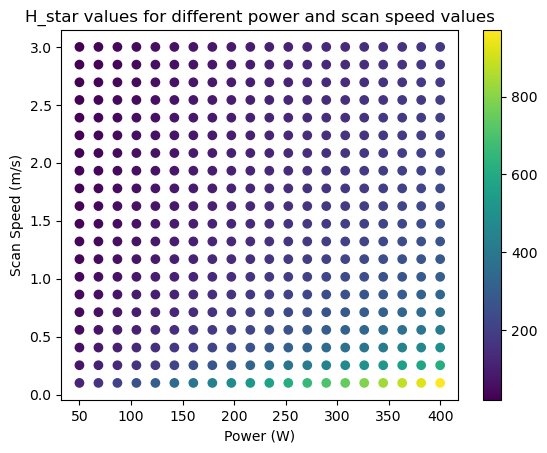

In [25]:
# plot the data
#use the H_star values as the color map

import matplotlib.pyplot as plt

plt.scatter(df['Power'], df['Scan Speed'], c=df['H_star'])
plt.colorbar()
plt.xlabel('Power (W)')
plt.ylabel('Scan Speed (m/s)')
plt.title('H_star values for different power and scan speed values')

        

plt.show()

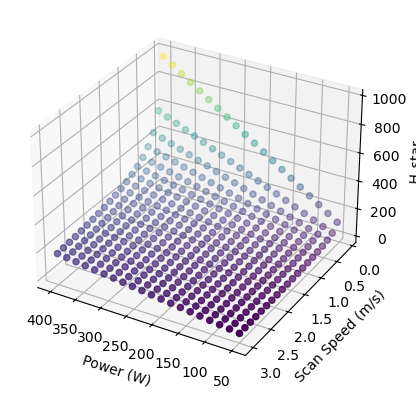

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Power'], df['Scan Speed'], df['H_star'], c=df['H_star'])
ax.set_xlabel('Power (W)')
ax.set_ylabel('Scan Speed (m/s)')
ax.set_zlabel('H_star')
ax.view_init(30, 120)
plt.show()




In [27]:
# fourier number for our aluminum
def Fourier(alpha=0.0000097, t=0.001, L=0.001):
    return alpha*t/L**2


SF = np.sqrt(Fourier())

print(SF)

0.09848857801796106


In [28]:
# def D_Depth(H):
#     a = 0.0152
#     b = -0.117
#     c = 1.215
#     # quadratic equation from the enthalpy paper
#     D = a*H**2 + b*H + c
#     return D


# def D_Width(H):
#     a = 0.00053
#     b = 0.158
#     c = 0.207
#     # quadratic equation from the enthalpy paper
#     W = a*H**2 + b*H + c
#     return W


In [29]:
# def Melt_mode(H):
#     Melt_mode = D_Depth(H) / D_Width(H)
#     #print(D_Depth(H), D_Width(H), Melt_mode)
#     if Melt_mode > 1:
#         #print("possible keyholes")
#         MM = 1
#     else:
#         #print("no keyholes")
#         MM = 0
#     return MM

In [30]:
# for i in range(50):
#     print(f"i={i}")
#     print(Melt_mode(i))


In [31]:
# read_depth = 0.00001*D_Depth(18)
# print(read_depth)

In [32]:
# H * 10 to get melt pool in micro meters


In [33]:
# reward function
H = H_star()
Scan_speed = 0.5
reward = (-0.01*(H - 150)**2) - 100*((scan_speed - 3)**4)
print(reward)

-179.36492119934113


  0%|          | 5742/20000000 [00:00<11:26, 29131.44it/s]

340.8989898989899 0.7373737373737375 -2857.017007883548 0


  1%|          | 105456/20000000 [00:03<10:20, 32043.64it/s]

337.3636363636364 2.4626262626262627 -10.422110152249564 100000


  1%|          | 204158/20000000 [00:07<10:22, 31825.08it/s]

376.2525252525253 1.416161616161616 -713.7476391097051 200000


  2%|▏         | 303946/20000000 [00:10<10:22, 31620.75it/s]

251.51515151515153 0.9787878787878787 -2055.7535359139624 300000


  2%|▏         | 406447/20000000 [00:13<09:50, 33172.00it/s]

170.2020202020202 0.43939393939393934 -3673.5159601607297 400000


  3%|▎         | 505132/20000000 [00:16<10:10, 31954.49it/s]

322.22222222222223 2.4909090909090907 -7.155811173770189 500000


  3%|▎         | 604011/20000000 [00:19<09:56, 32521.05it/s]

237.37373737373738 1.4878787878787878 -675.6554597221746 600000


  4%|▎         | 705206/20000000 [00:22<09:35, 33546.17it/s]

68.67676767676768 1.8969696969696968 -274.1529221206605 700000


  4%|▍         | 806917/20000000 [00:25<09:32, 33522.86it/s]

243.44444444444446 2.4909090909090907 -16.440334157383607 800000


  5%|▍         | 904347/20000000 [00:28<10:09, 31341.46it/s]

133.84848484848484 0.397979797979798 -4585.934350830319 900000


  5%|▌         | 1003239/20000000 [00:31<09:49, 32248.31it/s]

343.4343434343434 2.632323232323232 -3.3622284507574327 1000000


  6%|▌         | 1103803/20000000 [00:34<09:52, 31875.09it/s]

258.5858585858586 0.49797979797979797 -4854.425164678244 1100000


  6%|▌         | 1204297/20000000 [00:38<32:26, 9655.17it/s] 

279.7979797979798 1.601010101010101 -511.2379902365804 1200000


  7%|▋         | 1304816/20000000 [00:42<10:16, 30313.55it/s]

347.969696969697 2.094949494949495 -78.5883140051951 1300000


  7%|▋         | 1403648/20000000 [00:45<09:20, 33203.08it/s]

158.59595959595958 2.5757575757575757 -57.575542668437464 1400000


  8%|▊         | 1505210/20000000 [00:48<09:14, 33381.77it/s]

357.57575757575756 2.3363636363636364 -45.18293406088534 1500000


  8%|▊         | 1605195/20000000 [00:51<08:51, 34593.03it/s]

179.8080808080808 0.48282828282828283 -4039.304604408454 1600000


  9%|▊         | 1703873/20000000 [00:54<09:11, 33171.27it/s]

318.6868686868687 1.501010101010101 -529.4403234701037 1700000


  9%|▉         | 1805943/20000000 [00:57<09:23, 32280.70it/s]

325.75757575757575 2.8585858585858586 -0.08801721338420822 1800000


 10%|▉         | 1905896/20000000 [01:00<09:10, 32883.19it/s]

156.06060606060606 2.6606060606060606 -60.005660078281636 1900000


 10%|█         | 2005864/20000000 [01:03<09:02, 33150.69it/s]

50.0 3.0 -163.46714717833203 2000000


 11%|█         | 2106247/20000000 [01:06<09:05, 32805.70it/s]

50.0 1.9818181818181817 -258.1564789210551 2100000


 11%|█         | 2204527/20000000 [01:09<08:49, 33603.23it/s]

187.87878787878788 2.786868686868687 -42.488850001590436 2200000


 12%|█▏        | 2305109/20000000 [01:13<09:23, 31384.41it/s]

400.0 1.1898989898989898 -1245.9465148311458 2300000


 12%|█▏        | 2404093/20000000 [01:16<09:05, 32262.66it/s]

389.3939393939394 0.695959595959596 -3901.6388740785924 2400000


 13%|█▎        | 2505496/20000000 [01:19<08:45, 33292.26it/s]

166.66666666666669 0.4131313131313131 -5273.382209113157 2500000


 13%|█▎        | 2605317/20000000 [01:22<08:29, 34146.35it/s]

251.51515151515153 2.364646464646465 -33.98562468102161 2600000


 14%|█▎        | 2703526/20000000 [01:25<08:49, 32650.78it/s]

86.35353535353536 2.802020202020202 -123.1038419117031 2700000


 14%|█▍        | 2803731/20000000 [01:28<08:28, 33798.86it/s]

247.97979797979798 0.5111111111111111 -3972.05122749247 2800000


 15%|█▍        | 2903996/20000000 [01:31<09:13, 30907.76it/s]

290.4040404040404 0.611111111111111 -4098.478009596485 2900000


 15%|█▌        | 3005859/20000000 [01:34<08:40, 32636.62it/s]

50.0 1.9535353535353535 -270.1227138647382 3000000


 16%|█▌        | 3103512/20000000 [01:37<08:28, 33214.98it/s]

375.2525252525253 1.8272727272727272 -310.051895449942 3100000


 16%|█▌        | 3204119/20000000 [01:40<08:28, 33054.01it/s]

258.5858585858586 1.9686868686868686 -164.04504416421966 3200000


 17%|█▋        | 3303406/20000000 [01:43<08:27, 32867.38it/s]

194.94949494949495 2.11010101010101 -115.8355930361461 3300000


 17%|█▋        | 3405587/20000000 [01:47<08:15, 33523.89it/s]

236.37373737373738 2.604040404040404 -16.26169485017002 3400000


 18%|█▊        | 3505640/20000000 [01:50<08:38, 31817.02it/s]

315.1515151515152 0.44141414141414137 -5691.521098138687 3500000


 18%|█▊        | 3604573/20000000 [01:53<08:31, 32030.84it/s]

329.29292929292933 1.091919191919192 -1733.436831068373 3600000


 19%|█▊        | 3705483/20000000 [01:56<08:11, 33122.71it/s]

226.76767676767676 0.809090909090909 -2786.453071658715 3700000


 19%|█▉        | 3805197/20000000 [01:59<08:23, 32168.73it/s]

78.28282828282829 2.292929292929293 -146.74424360650147 3800000


 20%|█▉        | 3903477/20000000 [02:02<08:17, 32370.48it/s]

343.4343434343434 2.1666666666666665 -86.95174594720032 3900000


 20%|██        | 4005740/20000000 [02:05<07:51, 33914.59it/s]

264.6565656565657 2.4060606060606062 -15.909191840305466 4000000


 21%|██        | 4103569/20000000 [02:08<08:12, 32255.19it/s]

138.3838383838384 1.4878787878787878 -711.3100547296405 4100000


 21%|██        | 4205806/20000000 [02:11<08:13, 32008.36it/s]

279.7979797979798 0.8939393939393939 -2451.102946246526 4200000


 22%|██▏       | 4306148/20000000 [02:14<07:54, 33093.75it/s]

145.45454545454544 1.2050505050505051 -1308.6374901821982 4300000


 22%|██▏       | 4404732/20000000 [02:18<11:28, 22634.81it/s]

145.45454545454544 1.798989898989899 -327.96247967060526 4400000


 23%|██▎       | 4504490/20000000 [02:21<07:49, 32983.49it/s]

389.3939393939394 0.5545454545454546 -5057.135931924642 4500000


 23%|██▎       | 4606197/20000000 [02:24<07:32, 33992.70it/s]

364.64646464646466 1.7424242424242424 -386.28812846954185 4600000


 24%|██▎       | 4704486/20000000 [02:27<07:42, 33095.07it/s]

113.63636363636364 0.30000000000000004 -6166.748760497422 4700000


 24%|██▍       | 4804540/20000000 [02:30<07:58, 31776.01it/s]

389.3939393939394 2.44949494949495 -38.0544584553638 4800000


 25%|██▍       | 4905458/20000000 [02:33<07:35, 33152.83it/s]

187.87878787878788 1.5444444444444445 -594.5658556272402 4900000


 25%|██▌       | 5004860/20000000 [02:36<07:20, 34033.69it/s]

297.47474747474746 1.7424242424242424 -347.5479204759238 5000000


 26%|██▌       | 5105424/20000000 [02:39<07:21, 33717.43it/s]

276.26262626262627 2.562626262626263 -10.573040573534323 5100000


 26%|██▌       | 5206377/20000000 [02:42<07:32, 32665.03it/s]

286.86868686868684 0.8656565656565657 -2595.3293087545953 5200000


 27%|██▋       | 5303864/20000000 [02:45<07:21, 33285.08it/s]

364.64646464646466 2.392929292929293 -37.062490914280986 5300000


 27%|██▋       | 5405743/20000000 [02:48<07:29, 32471.63it/s]

191.41414141414143 1.516161616161616 -636.3574759937651 5400000


 28%|██▊       | 5506461/20000000 [02:52<07:31, 32106.23it/s]

392.92929292929296 1.4878787878787878 -787.5306109059873 5500000


 28%|██▊       | 5605539/20000000 [02:55<07:13, 33219.89it/s]

279.7979797979798 1.1484848484848484 -1485.951719707041 5600000


 29%|██▊       | 5703670/20000000 [02:58<07:23, 32236.98it/s]

336.3636363636364 2.3080808080808084 -44.92457523844863 5700000


 29%|██▉       | 5805018/20000000 [03:01<07:02, 33577.62it/s]

244.44444444444446 2.1383838383838385 -88.98766443645687 5800000


 30%|██▉       | 5903597/20000000 [03:04<07:06, 33062.66it/s]

396.4646464646465 1.5444444444444445 -691.7475130637994 5900000


 30%|███       | 6004804/20000000 [03:07<07:19, 31847.90it/s]

216.16161616161617 2.8717171717171714 -28.94914372898108 6000000


 31%|███       | 6104357/20000000 [03:11<06:58, 33190.28it/s]

219.6969696969697 2.5060606060606063 -29.537989950639552 6100000


 31%|███       | 6203980/20000000 [03:14<07:01, 32701.33it/s]

343.4343434343434 1.8838383838383839 -241.09692919326923 6200000


 32%|███▏      | 6303690/20000000 [03:17<06:55, 32936.10it/s]

353.04040404040404 3.0 -0.4637138697370663 6300000


 32%|███▏      | 6404141/20000000 [03:20<07:16, 31136.83it/s]

212.62626262626264 2.392929292929293 -42.86966090051305 6400000


 33%|███▎      | 6503393/20000000 [03:23<22:17, 10089.14it/s]

187.87878787878788 1.6858585858585857 -412.55447126917534 6500000


 33%|███▎      | 6603927/20000000 [03:27<07:28, 29897.91it/s]

85.35353535353536 2.0818181818181816 -214.57000010679167 6600000


 34%|███▎      | 6705244/20000000 [03:30<06:48, 32537.27it/s]

354.04040404040404 0.5828282828282828 -4594.888153371048 6700000


 34%|███▍      | 6804738/20000000 [03:33<06:46, 32448.49it/s]

290.4040404040404 2.7585858585858585 -3.364307212075576 6800000


 35%|███▍      | 6905326/20000000 [03:36<06:42, 32524.39it/s]

301.01010101010104 2.025252525252525 -136.11918546076134 6900000


 35%|███▌      | 7004928/20000000 [03:39<06:41, 32364.22it/s]

311.6161616161616 1.6575757575757575 -450.14627715966947 7000000


 36%|███▌      | 7105080/20000000 [03:42<06:23, 33620.51it/s]

322.22222222222223 2.815151515151515 -0.27777323683408633 7100000


 36%|███▌      | 7204963/20000000 [03:45<06:33, 32475.67it/s]

255.05050505050505 1.712121212121212 -199.3241909996913 7200000


 37%|███▋      | 7303730/20000000 [03:48<06:33, 32236.61it/s]

247.97979797979798 2.44949494949495 -24.60866663896419 7300000


 37%|███▋      | 7403827/20000000 [03:51<06:22, 32893.88it/s]

212.62626262626264 0.8656565656565657 -2505.556936106056 7400000


 38%|███▊      | 7506045/20000000 [03:54<06:30, 32032.64it/s]

131.31313131313132 0.9505050505050504 -2151.3637919608605 7500000


 38%|███▊      | 7604441/20000000 [03:58<06:22, 32379.93it/s]

145.45454545454544 0.5828282828282828 -4015.8049952491015 7600000


 39%|███▊      | 7703381/20000000 [04:01<06:18, 32519.98it/s]

156.06060606060606 1.1202020202020202 -1546.2296256169338 7700000


 39%|███▉      | 7804974/20000000 [04:04<06:13, 32649.38it/s]

141.91919191919192 2.5343434343434343 -74.59043664116318 7800000


 40%|███▉      | 7904354/20000000 [04:07<06:14, 32279.72it/s]

375.2525252525253 2.364646464646465 -46.293409830495264 7900000


 40%|████      | 8005163/20000000 [04:10<05:55, 33732.02it/s]

152.52525252525254 1.912121212121212 -238.89649690161187 8000000


 41%|████      | 8105294/20000000 [04:13<06:00, 32964.59it/s]

301.01010101010104 2.194949494949495 -68.00565787088941 8100000


 41%|████      | 8205007/20000000 [04:16<05:58, 32874.79it/s]

194.94949494949495 2.6737373737373735 -36.50405776097456 8200000


 42%|████▏     | 8305987/20000000 [04:20<06:05, 31981.11it/s]

173.73737373737373 0.4131313131313131 -5289.538575832947 8300000


 42%|████▏     | 8404939/20000000 [04:23<05:54, 32753.10it/s]

152.52525252525254 1.4878787878787878 -701.1285472031677 8400000


 43%|████▎     | 8506448/20000000 [04:26<05:55, 32351.38it/s]

177.27272727272728 1.9686868686868686 -189.32499567893382 8500000


 43%|████▎     | 8604709/20000000 [04:29<14:09, 13418.51it/s]

127.77777777777779 1.091919191919192 -1652.6173201153943 8600000


 44%|████▎     | 8704927/20000000 [04:33<05:50, 32261.64it/s]

223.23232323232324 0.30000000000000004 -6689.137345091512 8700000


 44%|████▍     | 8805155/20000000 [04:36<05:38, 33062.37it/s]

233.83838383838383 1.4878787878787878 -675.4978398157422 8800000


 45%|████▍     | 8906337/20000000 [04:39<05:26, 34012.34it/s]

329.29292929292933 2.93030303030303 -0.08317459821451434 8900000


 45%|████▌     | 9005883/20000000 [04:42<05:44, 31904.38it/s]

308.0808080808081 2.0818181818181816 -110.67242110574472 9000000


 46%|████▌     | 9104886/20000000 [04:45<05:34, 32535.90it/s]

389.3939393939394 1.7707070707070707 -378.0249493010442 9100000


 46%|████▌     | 9205514/20000000 [04:48<05:28, 32866.54it/s]

106.56565656565657 2.5060606060606063 -107.109123686069 9200000


 47%|████▋     | 9305831/20000000 [04:51<05:35, 31899.65it/s]

216.16161616161617 1.9404040404040404 -188.51965858156703 9300000


 47%|████▋     | 9403492/20000000 [04:54<05:16, 33519.93it/s]

240.9090909090909 0.3282828282828283 -6462.739205490306 9400000


 48%|████▊     | 9506147/20000000 [04:57<05:39, 30944.01it/s]

117.17171717171718 1.8555555555555554 -307.3292185340788 9500000


 48%|████▊     | 9602940/20000000 [05:00<05:37, 30767.51it/s]

336.3636363636364 2.364646464646465 -33.85032230934114 9600000


 49%|████▊     | 9705109/20000000 [05:04<05:09, 33214.87it/s]

230.3030303030303 2.6474747474747478 -19.64281937782818 9700000


 49%|████▉     | 9806438/20000000 [05:07<05:11, 32689.00it/s]

159.59595959595958 1.0353535353535355 -1822.594772755656 9800000


 50%|████▉     | 9906050/20000000 [05:10<05:08, 32702.86it/s]

354.04040404040404 0.4696969696969697 -5666.831455413935 9900000


 50%|█████     | 10006699/20000000 [05:13<05:01, 33137.26it/s]

141.91919191919192 1.5444444444444445 -620.8182005071444 10000000


 51%|█████     | 10104444/20000000 [05:16<05:01, 32834.48it/s]

191.41414141414143 0.5828282828282828 -4052.2960240290336 10100000


 51%|█████     | 10203693/20000000 [05:19<05:11, 31436.61it/s]

279.7979797979798 0.6393939393939393 -3868.180903473667 10200000


 52%|█████▏    | 10305089/20000000 [05:22<04:51, 33217.73it/s]

308.0808080808081 1.912121212121212 -205.64642741848897 10300000


 52%|█████▏    | 10405785/20000000 [05:25<04:47, 33336.88it/s]

329.29292929292933 2.902020202020202 -0.16197289090112849 10400000


 53%|█████▎    | 10504304/20000000 [05:28<04:54, 32294.35it/s]

244.44444444444446 0.9505050505050504 -2163.1948859697727 10500000


 53%|█████▎    | 10604868/20000000 [05:31<04:45, 32956.61it/s]

53.535353535353536 2.6606060606060606 -157.13073835718956 10600000


 54%|█████▎    | 10705732/20000000 [05:34<04:44, 32640.40it/s]

385.85858585858585 0.695959595959596 -3885.112754864564 10700000


 54%|█████▍    | 10805364/20000000 [05:38<04:40, 32752.87it/s]

371.7171717171717 2.2515151515151515 -71.55286342762116 10800000


 55%|█████▍    | 10905686/20000000 [05:41<04:28, 33875.65it/s]

283.33333333333337 2.7585858585858585 -4.637136209407935 10900000


 55%|█████▌    | 11006524/20000000 [05:44<04:30, 33213.76it/s]

392.92929292929296 2.562626262626263 -26.051169685137317 11000000


 56%|█████▌    | 11104302/20000000 [05:47<04:26, 33378.26it/s]

120.70707070707071 0.8656565656565657 -2511.8091049221684 11100000


 56%|█████▌    | 11205241/20000000 [05:50<04:24, 33283.90it/s]

336.3636363636364 1.2050505050505051 -1380.5539554216205 11200000


 57%|█████▋    | 11304824/20000000 [05:53<04:27, 32556.90it/s]

239.9090909090909 2.632323232323232 -14.851971925675683 11300000


 57%|█████▋    | 11403310/20000000 [05:56<04:24, 32451.14it/s]

233.83838383838383 2.194949494949495 -73.8866851095666 11400000


 58%|█████▊    | 11504663/20000000 [05:59<04:20, 32672.58it/s]

99.4949494949495 2.7454545454545456 -108.44390483796683 11500000


 58%|█████▊    | 11603960/20000000 [06:03<04:13, 33149.55it/s]

81.81818181818181 0.6393939393939393 -3707.446976906523 11600000


 59%|█████▊    | 11704639/20000000 [06:06<04:09, 33220.16it/s]

357.57575757575756 2.025252525252525 -156.1735674348887 11700000


 59%|█████▉    | 11804451/20000000 [06:09<04:20, 31518.03it/s]

57.07070707070707 2.3080808080808084 -184.6201030709986 11800000


 60%|█████▉    | 11905865/20000000 [06:12<04:15, 31663.09it/s]

212.62626262626264 1.9404040404040404 -189.66970515191028 11900000


 60%|██████    | 12004111/20000000 [06:15<04:07, 32261.42it/s]

215.16161616161617 0.3696969696969697 -4937.187607971197 12000000


 61%|██████    | 12106369/20000000 [06:19<04:00, 32817.60it/s]

304.54545454545456 2.786868686868687 -1.577574522918159 12100000


 61%|██████    | 12205723/20000000 [06:22<04:06, 31590.15it/s]

127.77777777777779 0.7525252525252525 -3044.921402812572 12200000


 62%|██████▏   | 12303708/20000000 [06:25<04:03, 31590.73it/s]

81.81818181818181 0.7525252525252525 -3088.982896626202 12300000


 62%|██████▏   | 12406185/20000000 [06:28<03:56, 32063.75it/s]

400.0 2.788888888888889 -14.726639065974895 12400000


 63%|██████▎   | 12505355/20000000 [06:31<03:49, 32720.92it/s]

357.57575757575756 1.091919191919192 -1783.3414223641144 12500000


 63%|██████▎   | 12604977/20000000 [06:34<03:49, 32245.20it/s]

134.84848484848484 1.2333333333333334 -1242.0417018946061 12600000


 64%|██████▎   | 12706328/20000000 [06:37<03:43, 32678.08it/s]

385.85858585858585 1.2050505050505051 -1462.568673904299 12700000


 64%|██████▍   | 12805825/20000000 [06:40<03:36, 33268.77it/s]

385.85858585858585 3.0 -5.467544800730087 12800000


 65%|██████▍   | 12904568/20000000 [06:44<03:38, 32464.44it/s]

247.97979797979798 1.1484848484848484 -1463.2069746578804 12900000


 65%|██████▌   | 13004609/20000000 [06:47<03:33, 32808.01it/s]

57.07070707070707 2.4212121212121214 -168.27728430486266 13000000


 66%|██████▌   | 13103510/20000000 [06:50<03:30, 32737.94it/s]

180.8080808080808 1.798989898989899 -305.4951947006808 13100000


 66%|██████▌   | 13204989/20000000 [06:53<03:32, 31980.18it/s]

85.35353535353536 2.9 -125.87869586902626 13200000


 67%|██████▋   | 13303391/20000000 [06:56<03:28, 32061.70it/s]

247.97979797979798 1.5444444444444445 -586.2073178247185 13300000


 67%|██████▋   | 13406193/20000000 [06:59<03:20, 32955.04it/s]

131.31313131313132 1.5575757575757574 -480.88607497510225 13400000


 68%|██████▊   | 13505513/20000000 [07:02<03:27, 31230.59it/s]

145.45454545454544 1.403030303030303 -856.5681152528596 13500000


 68%|██████▊   | 13604183/20000000 [07:06<03:17, 32323.97it/s]

219.6969696969697 1.0070707070707072 -1926.0196521114312 13600000


 69%|██████▊   | 13704328/20000000 [07:09<03:12, 32742.20it/s]

400.0 1.0070707070707072 -2215.2635594910025 13700000


 69%|██████▉   | 13803222/20000000 [07:12<03:09, 32691.74it/s]

194.94949494949495 1.5444444444444445 -592.0547657883662 13800000


 70%|██████▉   | 13905198/20000000 [07:15<03:07, 32454.67it/s]

180.8080808080808 2.3080808080808084 -71.42787388655157 13900000


 70%|███████   | 14004661/20000000 [07:19<03:00, 33134.99it/s]

184.34343434343435 1.416161616161616 -638.9906079021606 14000000


 71%|███████   | 14105273/20000000 [07:22<02:58, 33009.05it/s]

198.4848484848485 2.9 -38.54940645995899 14100000


 71%|███████   | 14206107/20000000 [07:25<02:51, 33840.31it/s]

117.17171717171718 1.4595959595959596 -777.266533583024 14200000


 72%|███████▏  | 14303511/20000000 [07:28<02:56, 32267.62it/s]

240.9090909090909 2.477777777777778 -24.077866729830475 14300000


 72%|███████▏  | 14406400/20000000 [07:31<02:55, 31961.49it/s]

336.3636363636364 0.6393939393939393 -4071.203841880832 14400000


 73%|███████▎  | 14503723/20000000 [07:34<02:56, 31192.89it/s]

67.67676767676768 1.7707070707070707 -432.8686054516898 14500000


 73%|███████▎  | 14606393/20000000 [07:37<02:46, 32460.74it/s]

339.8989898989899 1.8272727272727272 -285.81573917238785 14600000


 74%|███████▎  | 14703322/20000000 [07:40<02:47, 31554.78it/s]

244.44444444444446 1.8272727272727272 -262.92144561646404 14700000


 74%|███████▍  | 14804682/20000000 [07:43<02:40, 32346.49it/s]

57.07070707070707 2.562626262626263 -157.42444928474777 14800000


 75%|███████▍  | 14905894/20000000 [07:46<02:35, 32834.69it/s]

95.95959595959596 2.392929292929293 -127.78331257071787 14900000


 75%|███████▌  | 15005519/20000000 [07:50<02:35, 32210.71it/s]

127.77777777777779 1.601010101010101 -553.8737803259388 15000000


 76%|███████▌  | 15106226/20000000 [07:53<02:30, 32425.66it/s]

255.05050505050505 1.798989898989899 -286.49883423444834 15100000


 76%|███████▌  | 15206112/20000000 [07:56<02:27, 32517.83it/s]

163.13131313131314 0.3848484848484849 -5506.082219731336 15200000


 77%|███████▋  | 15305073/20000000 [07:59<02:28, 31578.26it/s]

255.05050505050505 2.1383838383838385 -87.18632326537143 15300000


 77%|███████▋  | 15404307/20000000 [08:02<02:20, 32710.15it/s]

138.3838383838384 0.8373737373737374 -2627.8591233597563 15400000


 78%|███████▊  | 15505375/20000000 [08:05<02:18, 32475.95it/s]

385.85858585858585 0.6393939393939393 -4306.12457526397 15500000


 78%|███████▊  | 15603503/20000000 [08:08<02:16, 32239.49it/s]

258.5858585858586 2.6191919191919193 -11.602209799483083 15600000


 79%|███████▊  | 15703720/20000000 [08:12<02:12, 32414.72it/s]

276.26262626262627 1.0636363636363637 -1762.9996733348983 15700000


 79%|███████▉  | 15806686/20000000 [08:15<02:08, 32710.85it/s]

60.60606060606061 2.815151515151515 -150.72707233483263 15800000


 80%|███████▉  | 15903711/20000000 [08:18<02:05, 32541.82it/s]

145.45454545454544 2.588888888888889 -68.09656928274815 15900000


 80%|████████  | 16003803/20000000 [08:21<02:02, 32722.96it/s]

396.4646464646465 3.0 -6.987422516849169 16000000


 81%|████████  | 16104715/20000000 [08:24<01:59, 32587.65it/s]

71.21212121212122 1.7707070707070707 -428.3034295972032 16100000


 81%|████████  | 16203968/20000000 [08:27<01:54, 33261.97it/s]

159.59595959595958 1.0070707070707072 -1923.3490385532596 16200000


 82%|████████▏ | 16303861/20000000 [08:31<01:50, 33367.89it/s]

292.93939393939394 2.2363636363636363 -34.01149541325506 16300000


 82%|████████▏ | 16404933/20000000 [08:34<01:47, 33340.19it/s]

322.22222222222223 2.1666666666666665 -80.70125357468332 16400000


 83%|████████▎ | 16506194/20000000 [08:37<01:44, 33348.48it/s]

60.60606060606061 1.0070707070707072 -2021.1281214264127 16500000


 83%|████████▎ | 16606238/20000000 [08:40<01:44, 32326.86it/s]

385.85858585858585 2.6191919191919193 -18.666534146846217 16600000


 84%|████████▎ | 16704095/20000000 [08:43<01:42, 32273.52it/s]

385.85858585858585 3.0 -5.080070286039439 16700000


 84%|████████▍ | 16804634/20000000 [08:46<01:38, 32437.21it/s]

50.0 1.176767676767677 -1495.8981666172078 16800000


 85%|████████▍ | 16906283/20000000 [08:49<01:33, 33135.18it/s]

279.7979797979798 1.6858585858585857 -404.0997525166131 16900000


 85%|████████▌ | 17003849/20000000 [08:52<01:29, 33472.18it/s]

339.8989898989899 1.7424242424242424 -368.2534025915208 17000000


 86%|████████▌ | 17104858/20000000 [08:56<01:25, 33931.26it/s]

385.85858585858585 1.9969696969696968 -190.1771916026353 17100000


 86%|████████▌ | 17205946/20000000 [08:59<01:24, 32931.83it/s]

279.7979797979798 1.0353535353535355 -1868.8714456547452 17200000


 87%|████████▋ | 17304482/20000000 [09:02<01:19, 33945.83it/s]

247.97979797979798 1.9404040404040404 -181.76637019050162 17300000


 87%|████████▋ | 17405657/20000000 [09:05<01:17, 33357.96it/s]

244.44444444444446 2.11010101010101 -99.16496096879662 17400000


 88%|████████▊ | 17504955/20000000 [09:08<01:16, 32798.35it/s]

244.44444444444446 2.6191919191919193 -15.489099689403488 17500000


 88%|████████▊ | 17604921/20000000 [09:11<01:13, 32803.56it/s]

262.1212121212121 2.604040404040404 -8.903767908121205 17600000


 89%|████████▊ | 17706215/20000000 [09:14<01:08, 33251.17it/s]

364.64646464646466 1.3464646464646464 -1046.6166941216416 17700000


 89%|████████▉ | 17806640/20000000 [09:17<01:06, 33068.58it/s]

385.85858585858585 3.0 -5.467544800730087 17800000


 90%|████████▉ | 17904830/20000000 [09:20<01:03, 32944.80it/s]

375.2525252525253 0.49797979797979797 -5522.325864119449 17900000


 90%|█████████ | 18005469/20000000 [09:23<01:00, 32902.73it/s]

53.535353535353536 2.6474747474747478 -158.61986891814712 18000000


 91%|█████████ | 18104777/20000000 [09:27<01:19, 23947.63it/s]

371.7171717171717 2.364646464646465 -44.83741223485338 18100000


 91%|█████████ | 18204327/20000000 [09:30<00:54, 32661.70it/s]

318.6868686868687 1.4313131313131313 -813.653076779313 18200000


 92%|█████████▏| 18303743/20000000 [09:33<00:51, 32794.64it/s]

237.37373737373738 2.364646464646465 -37.646022671406946 18300000


 92%|█████████▏| 18403677/20000000 [09:36<00:48, 32650.14it/s]

318.6868686868687 1.9404040404040404 -189.94057188117617 18400000


 93%|█████████▎| 18503453/20000000 [09:39<00:44, 33920.30it/s]

124.24242424242425 2.11010101010101 -164.53465163197228 18500000


 93%|█████████▎| 18604749/20000000 [09:42<00:43, 31888.25it/s]

311.6161616161616 1.4313131313131313 -808.0552772503797 18600000


 94%|█████████▎| 18705983/20000000 [09:45<00:40, 31936.56it/s]

173.73737373737373 2.3363636363636364 -71.06216686042531 18700000


 94%|█████████▍| 18806474/20000000 [09:48<00:35, 33165.06it/s]

110.1010101010101 0.695959595959596 -3356.6324574913233 18800000


 95%|█████████▍| 18903962/20000000 [09:51<00:32, 33560.70it/s]

95.95959595959596 0.8373737373737374 -2662.213364155893 18900000


 95%|█████████▌| 19005232/20000000 [09:54<00:31, 31480.76it/s]

103.03030303030303 1.3747474747474748 -949.9438650162872 19000000


 96%|█████████▌| 19105355/20000000 [09:57<00:27, 32563.83it/s]

131.31313131313132 2.6606060606060606 -79.19202312603895 19100000


 96%|█████████▌| 19205967/20000000 [10:01<00:24, 32305.51it/s]

173.73737373737373 1.5727272727272728 -560.2225160281132 19200000


 97%|█████████▋| 19306103/20000000 [10:04<00:21, 32281.53it/s]

177.27272727272728 2.5060606060606063 -51.28994460104237 19300000


 97%|█████████▋| 19403382/20000000 [10:07<00:18, 32937.90it/s]

148.989898989899 1.798989898989899 -325.3260976532818 19400000


 98%|█████████▊| 19504004/20000000 [10:10<00:14, 33245.67it/s]

194.94949494949495 0.7808080808080807 -2902.757673182316 19500000


 98%|█████████▊| 19603948/20000000 [10:13<00:12, 31959.07it/s]

240.9090909090909 1.9969696969696968 -150.53119186641797 19600000


 99%|█████████▊| 19704879/20000000 [10:16<00:08, 33336.65it/s]

53.535353535353536 0.9787878787878787 -2137.3486758690533 19700000


 99%|█████████▉| 19804196/20000000 [10:19<00:05, 35653.75it/s]

354.04040404040404 2.6191919191919193 -9.805134306071276 19800000


100%|█████████▉| 19904566/20000000 [10:22<00:02, 32594.22it/s]

53.535353535353536 2.0818181818181816 -253.4637855650127 19900000


100%|██████████| 20000000/20000000 [10:25<00:00, 31982.39it/s]


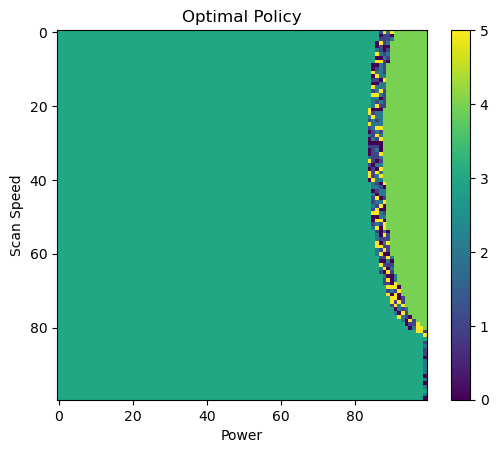

In [3]:
# q learning, table based

# state space: power, scan speed

# action space: power up, power down, power same, scan speed up, scan speed down, scan speed same

# H = (4 * self.absorptivity * power) * 100 * 0.9 * 0.3 / (np.pi * self.rho * (self.Cp * (self.T_solid - self.T_0) + self.hf) * np.sqrt(self.Diffusivity * scan_speed * self.beam_diameter**3))

# reward function = -0.01*(H_star(power, scan_speed) - 150)**2 - 100*((scan_speed - 3)**4)

# power range  = np.linsapce(50, 400, 100)

# scan speed range  = np.linsapce(0.2, 3.0, 100)

# explore the state space and action space

# start with a random state, random action

# update the q table

# repeat the process

# until the q table converges

# use the q table to find the optimal power and scan speed values

# plot the optimal power and scan speed values

# plot the H_star values for the optimal power and scan speed values

# intruduce a chance to pick a random action instead of the optimal action

# max epochs = 1000


import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


class QLearning:
    def __init__(self):
        self.alpha = 0.1
        self.gamma = 0.6
        self.epsilon = 0.1
        self.q_table = np.zeros((100, 100, 6))
        self.power_range = np.linspace(50, 400, 100)
        self.scan_speed_range = np.linspace(0.2, 3.0, 100)
        self.epochs = 20000000
        self.absorptivity = 0.3
        self.rho = 2500.0
        self.Cp = 915.0
        self.T_solid = 853.0
        self.T_0 = 300.0
        self.hf = 40000.0
        self.Diffusivity = 0.000097
        self.beam_diameter = 0.0001

    def H_star(self, power, scan_speed):
        H = ((4 * self.absorptivity * power) * 100 * 0.9 * 0.3 / (np.pi * self.rho * (self.Cp * (self.T_solid - self.T_0) + self.hf) * np.sqrt(self.Diffusivity * scan_speed * self.beam_diameter**3)))
        return H
    
    def reward(self, power, scan_speed):
        
        reward = (-0.01*(self.H_star(power, scan_speed) - 150)**2 - 100*((scan_speed - 3)**4))
        #print(power, scan_speed, reward)
        return reward
    
    def get_state(self, power, scan_speed):
        power_index = np.argmin(np.abs(self.power_range - power))
        scan_speed_index = np.argmin(np.abs(self.scan_speed_range - scan_speed))
        return power_index, scan_speed_index
    
    def get_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            action = np.random.choice(6)
        else:
            action = np.argmax(self.q_table[state])
        return action
    
    def update_q_table(self, state, action, reward, next_state):
        predict = self.q_table[state][action]
        target = reward + self.gamma * np.max(self.q_table[next_state])
        self.q_table[state][action] += self.alpha * (target - predict)

    def train(self):
        average_rewards = []
        for epoch in tqdm(range(self.epochs)):
            power = np.random.choice(self.power_range)
            scan_speed = np.random.choice(self.scan_speed_range)
            state = self.get_state(power, scan_speed)
            action = self.get_action(state)
            reward = self.reward(power, scan_speed)
            if action == 0:
                power = min(power + 1, self.power_range[-1])
            elif action == 1:
                power = max(power - 1, self.power_range[0])
            elif action == 3:
                scan_speed = min(scan_speed + 0.1, self.scan_speed_range[-1])
            elif action == 4:
                scan_speed = max(scan_speed - 0.1, self.scan_speed_range[0])
            next_state = self.get_state(power, scan_speed)
            self.update_q_table(state, action, reward, next_state)
            if epoch % 100000 == 0:
                print(power, scan_speed, epoch)
        return self.q_table
    
    def optimal_policy(self):
        optimal_policy = np.zeros((100, 100))
        for i in range(100):
            for j in range(100):
                optimal_policy[i][j] = np.argmax(self.q_table[i][j])
        return optimal_policy
    
    def plot_optimal_policy(self):
        optimal_policy = self.optimal_policy()
        plt.imshow(optimal_policy)
        plt.colorbar()
        plt.xlabel('Power')
        plt.ylabel('Scan Speed')
        plt.title('Optimal Policy')
        plt.show()

ql = QLearning()
q_table = ql.train()
ql.plot_optimal_policy()